## 실습 문제: 평균 제곱 오차(MSE) 함수 구현하기

**설명**:
평균 제곱 오차(Mean Squared Error, MSE)는 회귀(Regression) 문제에서 모델의 성능을 측정하는 대표적인 \*\*손실 함수(Loss Function)\*\*입니다. 모델이 예측한 값과 실제 정답 값 사이의 차이를 각각 제곱한 뒤, 그 값들의 평균을 내어 계산합니다. 오차를 제곱하기 때문에, 예측이 실제 값에서 많이 벗어날수록 훨씬 더 큰 페널티를 부여하는 특징이 있습니다.

이 실습에서는 NumPy를 사용하여 MSE 함수를 직접 구현하고, 주어진 예측값과 실제값 사이의 오차를 계산해 보겠습니다.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

여기서:

  * $n$ : 데이터의 개수
  * $y\_i$ : $i$번째 실제 정답 값
  * $\\hat{y}\_i$ : $i$번째 모델의 예측값

**요구사항**:

  * 모델의 예측값 `y_pred`와 실제 정답값 `y_true`가 NumPy 배열로 주어집니다.
  * `mse` 함수를 구현하여, 두 배열을 입력받아 MSE 값을 계산하도록 만드세요.
  * 계산 과정은 다음과 같습니다:
    1.  `y_pred`와 `y_true`의 차이를 계산합니다.
    2.  차이 배열의 각 원소를 제곱합니다. (`** 2` 또는 `np.square()` 사용)
    3.  제곱한 값들의 평균을 계산하여 반환합니다. (`np.mean()` 사용)
  * 구현한 함수를 호출하여 주어진 데이터에 대한 MSE 값을 계산하고 출력하세요.



In [1]:
import numpy as np

a = np.array([1,2,7])
b = np.array([0,1,0])
print(np.mean((a - b) ** 2))

17.0


In [2]:
import numpy as np

def mse(y_pred: np.ndarray, y_true: np.ndarray) -> float:
    """
    실제 값과 예측 값 사이의 평균 제곱 오차(MSE)를 계산합니다.

    Args:
        y_pred (np.ndarray): 모델의 예측 값 배열.
        y_true (np.ndarray): 실제 정답 값 배열.

    Returns:
        float: 계산된 MSE 값.
    """
    return np.mean((y_pred - y_true) ** 2)

    pass



In [3]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

mse(y_pred, y_true)

np.float64(0.375)

## 실습 문제: 정규 방정식을 이용한 선형 회귀 해 구하기
**설명**: 선형 회귀의 가중치(계수)를 찾는 방법 중 하나는 비용 함수를 최소화하는 해석적 솔루션인 '정규 방정식(Normal Equation)'을 푸는 것입니다. 이 방법은 경사 하강법과 같은 반복적인 최적화 없이 한 번의 계산으로 직접 해를 찾습니다. Scikit-learn의 캘리포니아 주택 가격 데이터셋을 불러온 뒤, NumPy를 사용하여 이 정규 방정식을 직접 구현해 봅니다.

$$\theta = (X^T X)^{-1} X^T y$$

**요구사항**:
- `solve_normal_equation` 함수 내에서 NumPy를 사용하여 $X$ 행렬에 절편(bias) 항(모든 값이 1인 열)을 추가하여 설계 행렬 `X_b`를 생성하세요. (힌트: `np.c_`와 `np.ones` 사용)
- `X_b`와 `y`를 사용하여 정규 방정식 공식 $\theta = (X_b^T X_b)^{-1} X_b^T y$을 NumPy 코드로 구현하세요. (힌트: 전치는 `.T`, 행렬 곱은 `@`, 역행렬은 `np.linalg.inv` 사용)
- 계산된 가중치 벡터 $\theta$ (첫 번째 요소는 절편, 나머지는 각 특성의 가중치)를 반환하세요.



In [ ]:
import numpy as np

arr = np.array([1,2,3,4,5])
np.c_[np.ones(())]

In [4]:
import numpy as np
from sklearn import datasets

def solve_normal_equation(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    정규 방정식(Normal Equation)을 사용하여 선형 회귀의
    해(가중치 벡터 세타)를 계산합니다.

    매개변수:
    X (np.ndarray): 입력 특성 행렬 (샘플 수 x 특성 수)
    y (np.ndarray): 타겟 벡터 (샘플 수,)

    반환값:
    np.ndarray: 계산된 가중치 벡터 세타 (절편 포함, (특성 수 + 1,))
    """

    # TODO: 1. X 행렬에 절편(bias) 항(1)을 추가하여 X_b를 만듭니다.
    # 힌트: np.c_[np.ones((X.shape[0], 1)), X]
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # TODO: 2. 정규 방정식 공식을 구현합니다.
    # theta = (X_b.T @ X_b)^-1 @ X_b.T @ y
    # 힌트: np.linalg.inv() 함수와 @ 연산자를 사용하세요.
    theta = np.linalg.inv((X_b.T @ X_b)) @ X_b.T @ y


    return theta



In [5]:
# 1. 캘리포니아 주택 가격 데이터셋 로드
# return_X_y=True는 (data, target) 튜플을 반환합니다.
X, y = datasets.fetch_california_housing(return_X_y=True)

print(f"데이터셋 특성 형태: {X.shape}")
print(f"데이터셋 타겟 형태: {y.shape}")

# 2. 정규 방정식을 사용하여 해(세타) 계산
# 참고: 캘리포니아 데이터셋은 (20640, 8) 크기로,
# (9x9) 역행렬 계산은 비교적 빠릅니다.
theta = solve_normal_equation(X, y)

print(f"\n계산된 세타 (절편 및 가중치):\n{theta}")

# 3. 결과 확인
print(f"\n(참고) 세타 벡터의 크기: {theta.shape}")
print(f"첫 번째 값은 절편(bias)이고, 나머지 {X.shape[1]}개는 각 특성의 가중치입니다.")

데이터셋 특성 형태: (20640, 8)
데이터셋 타겟 형태: (20640,)

계산된 세타 (절편 및 가중치):
[-3.69419202e+01  4.36693293e-01  9.43577804e-03 -1.07322041e-01
  6.45065694e-01 -3.97638940e-06 -3.78654266e-03 -4.21314377e-01
 -4.34513754e-01]

(참고) 세타 벡터의 크기: (9,)
첫 번째 값은 절편(bias)이고, 나머지 8개는 각 특성의 가중치입니다.


## 실습 문제: SVD를 이용한 선형 회귀 가중치($w$) 계산

**설명**:
선형 회귀 문제는 종종  $Xw = y$  형태의 선형 방정식 시스템으로 표현됩니다. 여기서  $X$ 는 입력 행렬,  $w$ 는 우리가 찾으려는 계수(가중치) 벡터,  $y$ 는 출력 벡터입니다. 선형 회귀의 손실 함수 $L(w) = \|y - Xw\|^2$ 를 최소화하는 $w$를 찾는 것이 목표입니다. 이 문제는 $Xw = y$ 라는 선형 방정식 시스템의 최소 제곱 해(least squares solution)를 찾는 것과 같습니다.

SVD는 행렬 $X$를 $X = U \Sigma V^T$ 로 분해하여 이 문제를 안정적으로 풉니다.
SVD를 이용하면 손실 함수는 $L(w') = \|y' - \Sigma w'\|^2$ (여기서 $y' = U^T y$, $w' = V^T w$) 라는 간단한 형태로 변환됩니다.

이 단순화된 문제의 해는 $w' = \Sigma^+ y'$ 이며,
이를 다시 원래의 $w$로 변환하면 최종 해의 공식 $w = V \Sigma^+ U^T y$ 를 얻을 수 있습니다.

$$w^* = V \Sigma^+ U^T y$$

이 실습의 목표는 `np.linalg.svd`를 사용하여 이 구성 요소들을 직접 계산하고 해 $w$를 구하는 것입니다.

**요구사항**:
- `solve_svd` 함수 내에서 `np.linalg.svd`를 호출하여 $X$의 SVD 구성 요소 $U$, $s$ (특이값 1차원 배열), $Vh$ ($V^T$)를 얻으세요.
- (힌트: `full_matrices=False` 옵션은 $U$의 크기를 `(m, k)`로 축소시켜 메모리와 계산을 효율화합니다.)
- $s$ 벡터의 역수(`1.0 / s`)를 계산하고 `np.diag()`를 사용해 $\Sigma^+$에 해당하는 대각 행렬(`Sigma_plus_diag`)을 만드세요.
- $w = V \Sigma^+ U^T y$ 공식을 NumPy의 행렬 곱셈 연산자(`@`)를 사용하여 구현하세요.
- (힌트: `np.linalg.svd`가 반환하는 `Vh`는 $V^T$입니다. 따라서 $V$는 `Vh.T`입니다. $U^T$는 `U.T`입니다.)
- 계산된 $w$ 벡터(가중치 및 절편)를 반환하세요.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def solve_svd(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    SVD(특이값 분해)를 사용하여 선형 방정식 시스템 Xw = y의
    최소 제곱 해 w (가중치 벡터)를 계산합니다.

    이는 손실 함수 L(w) = ||y - Xw||^2 를 최소화하는 w와 같습니다.

    매개변수:
    X (np.ndarray): 입력 특성 행렬 (m x n) (강의 자료의 X)
    y (np.ndarray): 타겟 벡터 (m,) (강의 자료의 y)

    반환값:
    np.ndarray: 해 벡터 w (n,) (강의 자료의 w)
    """

    # TODO: SVD 구성요소를 사용하여 w = V @ Sigma+ @ U.T @ y 를 계산하세요.

    # 1. X의 SVD를 계산합니다. (U, s, Vh)
    # X = U @ np.diag(S) @ Vh
    # 힌트: np.linalg.svd, full_matrices=False
    (U, s, Vh) = np.linalg.svd(X, full_matrices=False)

    # 2. s의 역수를 대각 행렬로 만듭니다. (Sigma_plus_diag)
    # 이것은 Sigma+ (유사 역행렬)에 해당합니다.
    # 힌트: np.diag(1.0 / S)
    Sigma_plus_diag = np.diag(1.0 / s)

    # 3. 해 w = V @ Sigma+ @ U.T @ y 를 계산합니다.
    # 힌트: Vh.T, Sigma_plus_diag, U.T, y 와 @ (행렬 곱) 연산자를 사용하세요.
    w = Vh.T @ Sigma_plus_diag @ U.T @ y

    pass

In [9]:
# --- 예제 데이터 ---
# y = 2x + 1 에 약간의 노이즈를 추가한 데이터
# Ax = b  ->  [x_data, 1] @ [m, c] = y_data

X_data = np.array([0, 1, 2, 3, 4, 5])
y_data = np.array([1.1, 2.9, 5.1, 7.0, 9.2, 10.8])

# A 행렬 (m x 2)
# np.vstack을 사용하여 [X_data]와 [1, 1, ...]을 쌓고 .T로 전치합니다.
A = np.vstack([X_data, np.ones(len(X_data))]).T

# b 벡터 (m,)
b = y_data

# SVD를 사용하여 해 x = [m, c] 를 찾습니다.
x_solution = solve_svd(A, b)

print(f"계산된 해 (m, c): {x_solution}")

# np.linalg.lstsq를 사용한 검증 (가장 표준적인 방법)
x_check, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
print(f"NumPy lstsq 검증 (m, c): {x_check}")

계산된 해 (m, c): None
NumPy lstsq 검증 (m, c): [1.98       1.06666667]


## 실습 문제: StandardScaler 클래스 구현하기

**설명**: StandardScaler는 머신러닝에서 매우 중요한 데이터 전처리(preprocessing) 단계입니다. 각 특성(feature, 열)의 평균을 0, 표준편차를 1이 되도록 데이터를 조정하는 **표준화(standardization)** 과정을 수행합니다. 이 실습에서는 NumPy를 사용하여 `StandardScaler` 클래스를 직접 구현합니다. `fit` 메서드는 데이터로부터 평균과 표준편차를 학습하고, `transform` 메서드는 학습된 값을 사용하여 데이터를 실제로 변환합니다.

$$z = \frac{x - \mu}{\sigma}$$
여기서 $\mu$는 특성의 평균, $\sigma$는 특성의 표준편차입니다.

**요구사항**:
- `StandardScaler` 클래스와 그 안의 `fit`, `transform` 메서드를 완성하세요.
- `fit(X)` 메서드:
    - 입력 데이터 `X` (`np.ndarray`)의 각 **열(column)**에 대해 평균(`mean`)과 표준편차(`std`)를 계산합니다. (`np.mean`, `np.std`를 `axis=0` 옵션과 함께 사용하세요.)
    - 계산된 평균과 표준편차를 각각 `self.mean_`, `self.std_` 인스턴스 변수에 저장하세요.
    - **수치 안정성**: 표준편차가 0에 매우 가까우면 (e.g., `self.epsilon` 미만), 나눗셈 오류를 방지하기 위해 해당 값을 **1.0**으로 처리해야 합니다. (`np.where` 사용)
- `transform(X)` 메서드:
    - `fit` 메서드에서 학습한 `self.mean_`과 `self.std_`를 사용하여 입력 데이터 `X`를 표준화하세요.
    - 변환된 데이터를 새로운 `np.ndarray` 객체로 반환하세요.



In [10]:

import numpy as np

class StandardScaler:
    """데이터의 각 특성을 표준화하는 클래스"""
    def __init__(self, epsilon: float = 1e-7):
        """
        epsilon: 0으로 나누는 것을 방지하기 위한 작은 값
        """
        self.mean_: np.ndarray | None = None
        self.std_: np.ndarray | None = None
        self.epsilon = epsilon

    def fit(self, X: np.ndarray):
        """
        입력 데이터 X로부터 각 특성의 평균과 표준편차를 계산하고 저장합니다.
        X: (n_samples, n_features) 형태의 2D NumPy 배열
        """
        # TODO: X의 각 열(axis=0)에 대한 평균(mean)을 계산하여 self.mean_에 저장하세요.
        self.mean_ = np.mean(X, axis=0)

        # TODO: X의 각 열(axis=0)에 대한 표준편차(std)를 계산하세요.
        std_dev = np.std(X, axis=0)

        # TODO: 수치 안정을 위해, std_dev가 self.epsilon보다 작은 값들을 1.0으로 대체하여 self.std_에 저장하세요.
        # (힌트: np.where(std_dev < self.epsilon, 1.0, std_dev) 사용)
        self.std_ = np.where(std_dev < self.epsilon, 1.0, std_dev)

    def transform(self, X: np.ndarray) -> np.ndarray | None:
        """
        fit()을 통해 학습된 평균과 표준편차를 사용하여 데이터를 변환합니다.
        X: (n_samples, n_features) 형태의 2D NumPy 배열
        """
        if self.mean_ is None or self.std_ is None:
            raise RuntimeError("Scaler has not been fitted yet. Call fit() first.")

        # TODO: (X - self.mean_) / self.std_ 공식을 사용하여 데이터를 변환하고 반환하세요.
        # NumPy 브로드캐스팅이 자동으로 행해집니다.
        return (X - self.mean_) / self.std_


In [11]:
# 아래 코드는 StandardScaler 클래스가 모두 구현된 후 정상적으로 작동해야 합니다.
# 1. 샘플 데이터 생성 (3개의 데이터, 4개의 특성)
# 4번째 특성(열)은 모두 5.0으로, 표준편차가 0인 경우를 테스트합니다.
X_train = np.array([
    [1.0, -1.0, 2.0, 5.0],
    [2.0, 0.0, 0.0, 5.0],
    [0.0, 1.0, -1.0, 5.0]
])

# 2. StandardScaler 객체 생성 및 학습
scaler = StandardScaler()
scaler.fit(X_train)

# 3. 데이터 변환
X_scaled = scaler.transform(X_train)

# 4. 결과 출력
print("Original Data:\n", X_train)

if scaler.mean_ is not None:
    print("\nFitted Mean (self.mean_):", scaler.mean_)
else:
    print("\nFitted Mean (self.mean_): [TODO]")

if scaler.std_ is not None:
    print("\nFitted Std Dev (self.std_):", scaler.std_)
else:
    print("\nFitted Std Dev (self.std_): [TODO]")

print("\n--- Verification ---")
print("Scaled Data:\n", X_scaled)

# 5. 검증: 변환된 데이터의 평균과 표준편차 확인
scaled_mean = np.mean(X_scaled, axis=0)
scaled_std = np.std(X_scaled, axis=0)

print("\nMean of Scaled Data:", scaled_mean)
print("Std Dev of Scaled Data:", scaled_std)

# 평균은 0에 가까워야 함 (상수 열 포함)
print("Is mean close to 0?", np.allclose(scaled_mean, 0))
# 비-상수 열의 표준편차는 1에 가까워야 함
print("Is std dev of non-constant columns close to 1?", np.allclose(scaled_std[:-1], 1))
# 상수 열의 표준편차는 0이어야 함 ( (5-5)/1 = 0 이므로)
print("Is std dev of constant column 0?", np.allclose(scaled_std[-1], 0))

Original Data:
 [[ 1. -1.  2.  5.]
 [ 2.  0.  0.  5.]
 [ 0.  1. -1.  5.]]

Fitted Mean (self.mean_): [1.         0.         0.33333333 5.        ]

Fitted Std Dev (self.std_): [0.81649658 0.81649658 1.24721913 1.        ]

--- Verification ---
Scaled Data:
 [[ 0.         -1.22474487  1.33630621  0.        ]
 [ 1.22474487  0.         -0.26726124  0.        ]
 [-1.22474487  1.22474487 -1.06904497  0.        ]]

Mean of Scaled Data: [0. 0. 0. 0.]
Std Dev of Scaled Data: [1. 1. 1. 0.]
Is mean close to 0? True
Is std dev of non-constant columns close to 1? True
Is std dev of constant column 0? True


## 실습 문제: 경사 하강법을 이용한 선형 회귀

**설명**:
선형 회귀의 가중치(계수 $w$)를 찾는 가장 일반적인 방법 중 하나는 비용 함수(Cost Function, $L(w)$, 보통 MSE)를 최소화하는 것입니다.
경사 하강법(Gradient Descent)은 비용 함수의 그래디언트(기울기, $\nabla L(w)$)를 계산하여, 기울기의 반대 방향으로 $w$ 값을 반복적으로 업데이트하며 최적의 해를 찾아가는 알고리즘입니다. 이 실습에서는 캘리포니아 주택 가격 데이터셋에 배치 경사 하강법(Batch Gradient Descent)을 적용하여 $w$를 직접 계산해 봅니다.
(참고: 경사 하강법은 특성들의 스케일에 민감하므로, 코드 스니펫에서 우리가 이전에 구현한 `StandardScaler`를 사용해 데이터 스케일링을 수행합니다.)

**그래디언트 공식**:
MSE 손실 함수 $L(w) = \frac{1}{m} \|X_b w - y\|^2$ 를 $w$로 미분하면 다음과 같은 그래디언트 공식을 얻습니다.
$$
\nabla L(w) = \frac{2}{m} X_b^T (X_b w - y)
$$

**요구사항**:
- `gradient_descent` 함수를 완성하세요.
- $X$ 행렬에 절편(bias) 항(모든 값이 1인 열)을 추가하여 `X_b` 행렬을 생성하세요.
- `w` 벡터를 0으로 초기화하세요. 크기는 `X`의 특성 수 + 1 (절편 항) 이어야 합니다.
- `n_iterations` 횟수만큼 반복하는 루프를 구현하세요.
- 루프 내부에서, 위 그래디언트 공식 $\nabla L(w)$를 계산하세요. ($m$은 샘플 수)
- 계산된 그래디언트와 학습률 `eta` ($\eta$)를 사용하여 `w` 벡터를 업데이트하세요.
- 최종적으로 계산된 `w` 벡터와 `loss_history`를 반환하세요.

In [12]:
import numpy as np
from sklearn import datasets

def gradient_descent(X: np.ndarray, y: np.ndarray,
                   learning_rate: float,
                   n_iterations: int) -> np.ndarray:
    """
    배치 경사 하강법(Batch Gradient Descent)을 사용하여
    선형 회귀의 가중치(세타)를 계산합니다.

    매개변수:
    X (np.ndarray): 입력 특성 행렬 (샘플 수 x 특성 수)
    y (np.ndarray): 타겟 벡터 (샘플 수,)
    learning_rate (float): 학습률 (알파)
    n_iterations (int): 반복 횟수

    반환값:
    np.ndarray: 계산된 가중치 벡터 세타 (절편 포함, (특성 수 + 1,))
    """
    n_samples, n_features = X.shape

    # 손실을 기록할 리스트 초기화
    loss_history = []

    # TODO: 1. X 행렬에 절편(bias) 항(1)을 추가하여 X_b를 만듭니다.
    # 힌트: np.c_
    X_b = np.c_[np.ones((n_samples, 1)), X]

    # TODO: 2. 가중치 벡터 w (theta -> w)를 (n_features + 1) 크기의 0 벡터로 초기화합니다.
    # 힌트: np.zeros()
    w = np.zeros(n_features + 1)

    # 3. n_iterations 만큼 반복합니다.
    for i in range(n_iterations):

        # TODO: 4. 예측값 (h_w)을 계산합니다. (X_b @ w)
        predictions = X_b @ w # <-- 학생이 구현

        # TODO: 5. 오차 "벡터"를 계산합니다. (업데이트용 재료)
        errors = predictions - y

        # TODO: 6. 현재 손실 "스칼라"를 계산하고 기록합니다. (모니터링용)
        # 힌트: mse() 함수 사용
        current_loss = mse(predictions, y) # <-- 학생이 구현
        loss_history.append(current_loss)

        # TODO: 7. 그래디언트 "벡터"를 계산합니다. (nabla L(w))
        # 공식: (1/m) * X_b.T @ errors
        gradient = (1/n_samples) * X_b.T @ errors # <-- 학생이 구현

        # TODO: 8. w (가중치 벡터)를 업데이트합니다. (실제 학습)
        # w_new = w_old - eta * gradient
        w = w - learning_rate * gradient # <-- 학생이 구현

    return w, loss_history


원본 데이터 형태: (20640, 8)
스케일링된 데이터의 평균 (0에 가까워야 함): 
[ 5.50808322e-17  4.40646658e-17  7.71131651e-17 -1.00522519e-16
 -1.10161664e-17  0.00000000e+00  2.24729795e-15 -8.60362599e-15]
스케일링된 데이터의 표준편차 (1에 가까워야 함): 
[1. 1. 1. 1. 1. 1. 1. 1.]
--- Gradient Descent Results ---
Learned Theta (Weights):
[ 2.06846887  0.81659877  0.17689017 -0.12729893  0.14127008  0.0166395
 -0.04392099 -0.48604502 -0.44967077]

Final MSE Loss: 0.5531


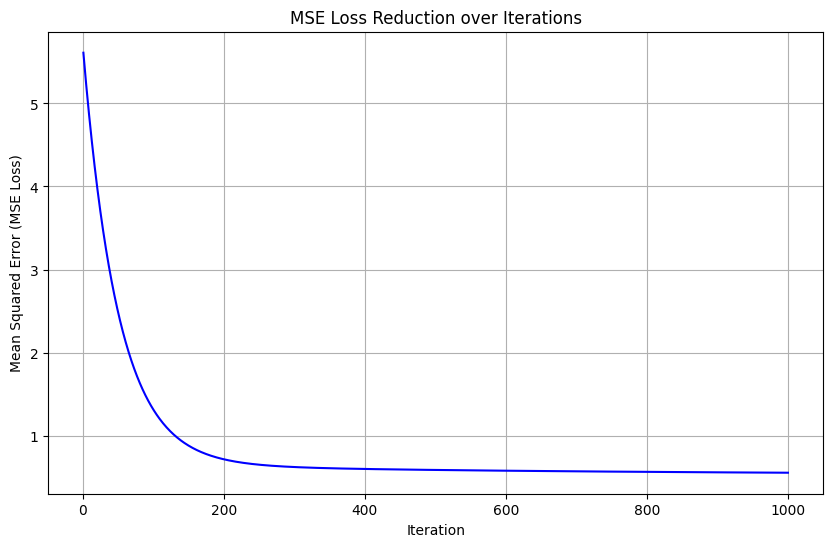

In [13]:
# --- 데이터 준비 ---
# 1. 캘리포니아 주택 가격 데이터셋 로드
X, y = datasets.fetch_california_housing(return_X_y=True)
print(f"원본 데이터 형태: {X.shape}")

# 2. !! 중요: 우리가 만든 StandardScaler로 특성을 스케일링합니다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(f"스케일링된 데이터의 평균 (0에 가까워야 함): \n{np.mean(X_scaled, axis=0)}")
print(f"스케일링된 데이터의 표준편차 (1에 가까워야 함): \n{np.std(X_scaled, axis=0)}")

# --- 하이퍼파라미터 설정 ---
learning_rate = 0.01
n_iterations = 1000

# 4. 경사 하강법 실행
theta, loss_history = gradient_descent(X_scaled, y, learning_rate, n_iterations)

print("--- Gradient Descent Results ---")
print(f"Learned Theta (Weights):\n{theta}")
print(f"\nFinal MSE Loss: {loss_history[-1]:.4f}")

# 5. 손실(MSE) 감소 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), loss_history, 'b-')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE Loss)")
plt.title("MSE Loss Reduction over Iterations")
plt.grid(True)
plt.show()